In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import matplotlib


# from analysis_plot_kit.core import fig_generator
from psPlotKit.data_plotter.fig_generator import figureGenerator

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_10832\3709177697.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# read in data
data_property_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_sea.csv')
data_property_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_nacl.csv')
data_property_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_simple.csv')
data_property_reatoro_RO = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_RO_reaktoro.csv')
data_property_reatoro_MVC = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_MVC_reaktoro.csv')
# Feed TDS,Temperature,Enthalpy,Vap Pressure,Osmotic Pressure,Density

In [22]:
# find errors and create dataframe
results_col = ["Osmotic Pressure", "Density"] 
error_sea = pd.DataFrame()
error_nacl = pd.DataFrame()
error_simple = pd.DataFrame()

for i in results_col:
    error_sea[i] = pd.DataFrame((data_property_reatoro_RO[i] - data_property_seawater[i]) / data_property_reatoro_RO[i]) * 100
    error_nacl[i] = pd.DataFrame((data_property_reatoro_RO[i] - data_property_nacl[i]) / data_property_reatoro_RO[i]) * 100
    error_simple[i] = pd.DataFrame((data_property_reatoro_RO[i] - data_property_simple[i]) / data_property_reatoro_RO[i]) * 100

results_col_2 = ["Enthalpy","Vap Pressure"]  

for i in results_col_2:
    if i == "Enthalpy":
        error_sea[i] = pd.DataFrame((abs(data_property_reatoro_MVC[i]) - (data_property_seawater[i])) / abs(data_property_reatoro_MVC[i])) * 100
        error_nacl[i] = pd.DataFrame((abs(data_property_reatoro_MVC[i]) - (data_property_nacl[i])) / abs(data_property_reatoro_MVC[i])) * 100
        error_simple[i] = pd.DataFrame((abs(data_property_reatoro_MVC[i]) - (data_property_simple[i])) / abs(data_property_reatoro_MVC[i])) * 100
    else:
        error_sea[i] = pd.DataFrame(abs(data_property_reatoro_MVC[i] - data_property_seawater[i]) / data_property_reatoro_MVC[i]) * 100
        error_nacl[i] = pd.DataFrame(abs(data_property_reatoro_MVC[i] - data_property_nacl[i]) / data_property_reatoro_MVC[i]) * 100
        error_simple[i] = pd.DataFrame(abs(data_property_reatoro_MVC[i] - data_property_simple[i]) / data_property_reatoro_MVC[i]) * 100

col = ["Density","Osmotic Pressure", "Vap Pressure","Enthalpy",] 

In [23]:
# NaCl errors
for i in col:
    print(i)
    print(min(error_sea[i]))
    print(max(error_sea[i]))

Density
0.060099587972990025
1.5570378662066837
Osmotic Pressure
-4.48880159368771
0.1474711103598455
Vap Pressure
0.033895286346148
2.2588370674902225
Enthalpy
0.5464697961110342
11.798181087047096


In [24]:
# NaCl errors
for i in col:
    print(i)
    print(min(error_nacl[i]))
    print(max(error_nacl[i]))

Density
0.2860901501850983
2.0795676627916753
Osmotic Pressure
-10.577448315845563
-6.7342596409635425
Vap Pressure
0.071732728205567
6.471425794282536
Enthalpy
-2.4157617597339387
-0.0028925126658117814


In [25]:
# NaCl errors
for i in col:
    print(i)
    print(min(error_simple[i]))
    print(max(error_simple[i]))

Density
-1.3292677329005065
11.240108819626586
Osmotic Pressure
-25.539090597598225
-2.245520782151969
Vap Pressure
12.570076912485012
642.7465073635652
Enthalpy
-23.790233157808927
-3.5285006308804587


In [5]:
# xticks = ([3.361113e-02,4.838276e-02,9.373868e-02,1.366460e-01,1.775197e-01]) # actual input varied in parameter sweep
x_plot = np.repeat([34.4, 50.0, 100.0, 150.0, 200.0], 8) #kg/m3 Reaktoro @ 25 C
xticks = ([34.4, 50.0, 100.0, 150.0, 200.0])
yticks = np.linspace(
    min(data_property_nacl["Temperature"])- 273.15, max(data_property_nacl["Temperature"])- 273.15, 8
)
xticks = xticks
yticks = np.around(yticks, decimals=0)

In [6]:
# figure.set_default_figure_settings(font_size=12, label_size=12)

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_10832\3444278353.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 23.87192 34.4 25.0
[0] [1] 24.61869 34.4 35.0
[0] [2] 25.3106 34.4 45.0
[0] [3] 25.95159 34.4 55.0
[0] [4] 26.54434 34.4 65.0
[0] [5] 27.09057 34.4 75.0
[0] [6] 27.59126 34.4 85.0
[0] [7] 28.04677 34.4 95.0
[1] [0] 34.68315 50.0 25.0
[1] [1] 35.79735 50.0 35.0
[1] [2] 36.82151 50.0 45.0
[1] [3] 37.76281 50.0 55.0
[1] [4] 38.62626 50.0 65.0
[1] [5] 39.4152 50.0 75.0
[1] [6] 40.13165 50.0 85.0
[1] [7] 40.77658 50.0 95.0
[2] [0] 70.15696 100.0 25.0
[2] [1] 72.52946 100.0 35.0
[2] [2] 74.671 100.0 45.0
[2] [3] 76.60336 100.0 55.0
[2] [4] 78.34217 100.0 65.0
[2] [5] 79.89827 100.0 75.0
[2] [6] 81.27874 100.0 85.0
[2] [7] 82.48773 100.0 95.0
[3] [0] 107.5804 150.0 25.0
[3] [1] 111.2715 150.0 35.0
[3] [2] 114.5628 150.0 45.0
[3] [3] 117.4952 150.0 55.0
[3] [4] 120.0982 150.0 65.0
[3] [5] 122.3927 150.0 75.0
[3] [6] 124.3923 150.0 85.0
[3] [7] 126.1055 150.0 95.0
[4] [0] 147.2441 200.0 25.0
[4] [1] 152.2364 200.0 3

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_10832\3444278353.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 1022.405 34.4 25.0
[0] [1] 1019.027 34.4 35.0
[0] [2] 1014.982 34.4 45.0
[0] [3] 1010.347 34.4 55.0
[0] [4] 1005.178 34.4 65.0
[0] [5] 999.5216 34.4 75.0
[0] [6] 993.4134 34.4 85.0
[0] [7] 986.8817 34.4 95.0
[1] [0] 1033.426 50.0 25.0
[1] [1] 1029.885 50.0 35.0
[1] [2] 1025.742 50.0 45.0
[1] [3] 1021.056 50.0 55.0
[1] [4] 1015.878 50.0 65.0
[1] [5] 1010.246 50.0 75.0
[1] [6] 1004.196 50.0 85.0
[1] [7] 997.7522 50.0 95.0
[2] [0] 1066.795 100.0 25.0
[2] [1] 1062.748 100.0 35.0
[2] [2] 1058.298 100.0 45.0
[2] [3] 1053.461 100.0 55.0
[2] [4] 1048.258 100.0 65.0
[2] [5] 1042.714 100.0 75.0
[2] [6] 1036.852 100.0 85.0
[2] [7] 1030.698 100.0 95.0
[3] [0] 1097.727 150.0 25.0
[3] [1] 1093.188 150.0 35.0
[3] [2] 1088.445 150.0 45.0
[3] [3] 1083.467 150.0 55.0
[3] [4] 1078.25 150.0 65.0
[3] [5] 1072.801 150.0 75.0
[3] [6] 1067.136 150.0 85.0
[3] [7] 1061.277 150.0 95.0
[4] [0] 1126.635 200.0 25.0
[4] [1] 1121.618 200.

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_10832\3444278353.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 3.074443 34.4 25.0
[0] [1] 5.458381 34.4 35.0
[0] [2] 9.299881 34.4 45.0
[0] [3] 15.262739999999999 34.4 55.0
[0] [4] 24.22251 34.4 65.0
[0] [5] 37.27646 34.4 75.0
[0] [6] 55.77617 34.4 85.0
[0] [7] 81.33919999999999 34.4 95.0
[1] [0] 3.048841 50.0 25.0
[1] [1] 5.413667 50.0 35.0
[1] [2] 9.224999 50.0 45.0
[1] [3] 15.14466 50.0 55.0
[1] [4] 24.03625 50.0 65.0
[1] [5] 36.99192 50.0 75.0
[1] [6] 55.354 50.0 85.0
[1] [7] 80.72942 50.0 95.0
[2] [0] 2.975368 100.0 25.0
[2] [1] 5.2833559999999995 100.0 35.0
[2] [2] 9.003825999999998 100.0 45.0
[2] [3] 14.78382 100.0 55.0
[2] [4] 23.4682 100.0 65.0
[2] [5] 36.126050000000006 100.0 75.0
[2] [6] 54.072300000000006 100.0 85.0
[2] [7] 78.88239 100.0 95.0
[3] [0] 2.9159050000000004 150.0 25.0
[3] [1] 5.177207999999999 150.0 35.0
[3] [2] 8.822512000000001 150.0 45.0
[3] [3] 14.485790000000001 150.0 55.0
[3] [4] 22.99452 150.0 65.0
[3] [5] 35.39528 150.0 75.0
[3] [6] 52.

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_10832\3444278353.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 99.93233000000001 34.4 25.0
[0] [1] 140.13479999999998 34.4 35.0
[0] [2] 180.4398 34.4 45.0
[0] [3] 220.87220000000002 34.4 55.0
[0] [4] 261.3617 34.4 65.0
[0] [5] 301.9755 34.4 75.0
[0] [6] 342.75359999999995 34.4 85.0
[0] [7] 383.74940000000004 34.4 95.0
[1] [0] 98.11503 50.0 25.0
[1] [1] 137.68689999999998 50.0 35.0
[1] [2] 177.35760000000002 50.0 45.0
[1] [3] 217.10760000000002 50.0 55.0
[1] [4] 256.93629999999996 50.0 65.0
[1] [5] 296.8614 50.0 75.0
[1] [6] 336.9161 50.0 85.0
[1] [7] 377.14709999999997 50.0 95.0
[2] [0] 92.86222000000001 100.0 25.0
[2] [1] 130.6479 100.0 35.0
[2] [2] 168.5434 100.0 45.0
[2] [3] 206.4895 100.0 55.0
[2] [4] 244.4604 100.0 65.0
[2] [5] 282.45509999999996 100.0 75.0
[2] [6] 320.48940000000005 100.0 85.0
[2] [7] 358.592 100.0 95.0
[3] [0] 88.24044 150.0 25.0
[3] [1] 124.46130000000001 150.0 35.0
[3] [2] 160.8139 150.0 45.0
[3] [3] 197.21110000000002 150.0 55.0
[3] [4] 233.6

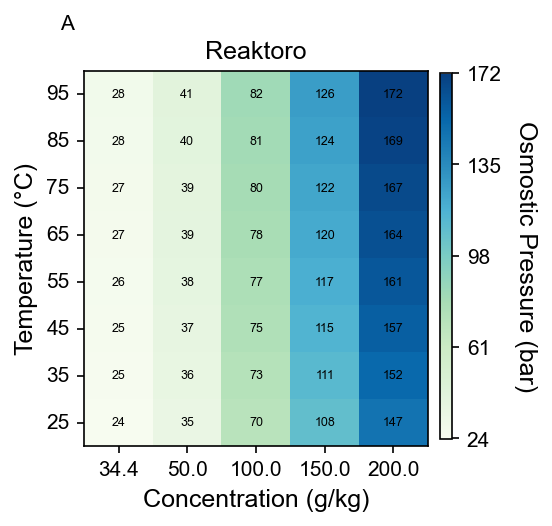

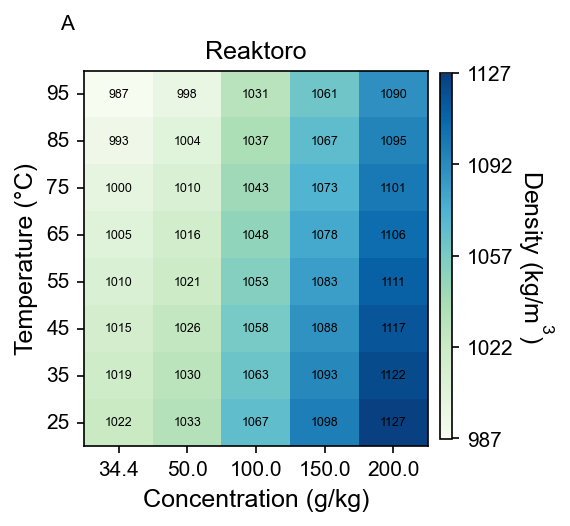

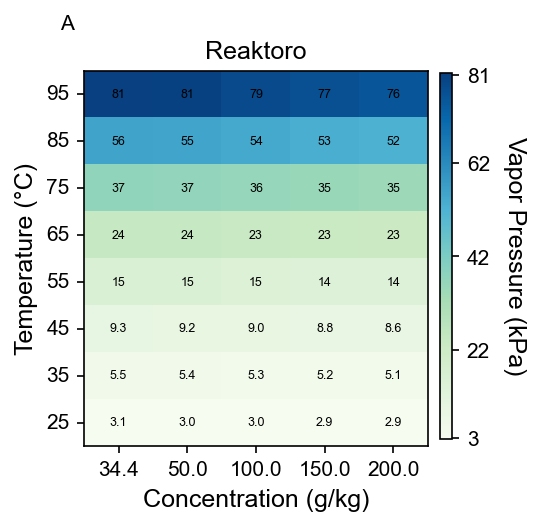

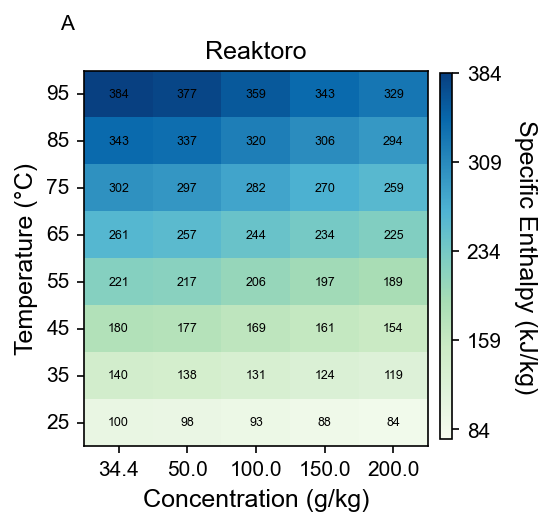

In [7]:
vmin = np.min(data_property_reatoro_RO["Osmotic Pressure"])/1e5
vmax = np.max(data_property_reatoro_RO["Osmotic Pressure"])/1e5

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=0)
figure = figureGenerator()

figure.init_figure()
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 8.5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_reatoro_RO["Temperature"] - 273.15,
    zdata=data_property_reatoro_RO["Osmotic Pressure"]/1e5,
    text=True,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Osmostic Pressure (bar)")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration (g/kg)",
    ylabel="Temperature (°C)",
)

figure.save_fig(name="plot_reaktoro_osm_p")

vmin = np.min(data_property_reatoro_RO["Density"])
vmax = np.max(data_property_reatoro_RO["Density"])

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=0)
figure = figureGenerator()
figure.init_figure()
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 8.5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_reatoro_RO["Temperature"] - 273.15,
    zdata=data_property_reatoro_RO["Density"],
    text=True,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Density (kg/m$^{3}$)", zlabelpad=20)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration (g/kg)",
    ylabel="Temperature (°C)",
)

figure.save_fig(name="plot_reaktoro_dens")

vmin = np.min(data_property_reatoro_MVC["Vap Pressure"])/1000
vmax = np.max(data_property_reatoro_MVC["Vap Pressure"])/1000

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=0)
figure = figureGenerator()
figure.init_figure()
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 8.5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_reatoro_MVC["Temperature"] - 273.15,
    zdata=data_property_reatoro_MVC["Vap Pressure"]/1000,
    text=True,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Vapor Pressure (kPa)")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration (g/kg)",
    ylabel="Temperature (°C)",
)

figure.save_fig(name="plot_reaktoro_vap_p")

vmin = abs(np.min(data_property_reatoro_MVC["Enthalpy"]))/1000
vmax = abs(np.max(data_property_reatoro_MVC["Enthalpy"]))/1000
# vmin = abs(vmin-ref)
# vmax = abs(vmax-ref)

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=0)
figure = figureGenerator()
figure.init_figure()
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 8.5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_reatoro_MVC["Temperature"] - 273.15,
    zdata=abs(data_property_reatoro_MVC["Enthalpy"])/1000,
    text=True,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Specific Enthalpy (kJ/kg)")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration (g/kg)",
    ylabel="Temperature (°C)",
)

figure.save_fig(name="plot_reaktoro_enthalpy")

In [8]:
import matplotlib.colors as mcolors

# sample the colormaps that you want to use. Use 128 from each so we get 256
# colors in total
# colors1 = plt.cm.Oranges_r(np.linspace(0., 1, 75))
colors2 = plt.cm.YlGn(np.linspace(0, 1, 175))
colors3 = plt.cm.YlGn_r(np.linspace(0, 1, 175))
# colors4 = plt.cm.Oranges(np.linspace(0., 1, 75))

# combine them and build a new colormap
colors = np.vstack((colors2, colors3))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
error_map = mymap


In [9]:
error_map = mcolors.LinearSegmentedColormap.from_list('Random gradient 8360', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%208360=FED976-FFEDA0-D9F0A3-ADDD8E-78C679-41AB5D-238443-006837-004529-006837-238443-41AB5D-78C679-ADDD8E-D9F0A3-FFEDA0-FED976
    (0.000, (0.996, 0.851, 0.463)),
    (0.063, (1.000, 0.929, 0.627)),
    (0.125, (0.851, 0.941, 0.639)),
    (0.188, (0.678, 0.867, 0.557)),
    (0.250, (0.471, 0.776, 0.475)),
    (0.313, (0.255, 0.671, 0.365)),
    (0.375, (0.137, 0.518, 0.263)),
    (0.438, (0.000, 0.408, 0.216)),
    (0.500, (0.000, 0.271, 0.161)),
    (0.563, (0.000, 0.408, 0.216)),
    (0.625, (0.137, 0.518, 0.263)),
    (0.688, (0.255, 0.671, 0.365)),
    (0.750, (0.471, 0.776, 0.475)),
    (0.813, (0.678, 0.867, 0.557)),
    (0.875, (0.851, 0.941, 0.639)),
    (0.938, (1.000, 0.929, 0.627)),
    (1.000, (0.996, 0.851, 0.463))))

In [10]:
def colormap_prop_error(data, error_data, xticks, yticks, z_format=0, i = "Osmotic Pressure", title = "prop_name", letter = "A", file_name="file"):
    # vmin = np.min([np.min(error_sea[i]), np.min(error_nacl[i]), np.min(error_simple[i])])
    vmin = -10
    vmax = 10
    # vmin = np.min([np.min(error_sea[i]), np.min(error_nacl[i])])
    # vmax = np.max([np.max(error_sea[i]), np.max(error_nacl[i])])

    zticks = np.linspace(vmin, vmax, 5)
    zticks = np.around(zticks, decimals=z_format)
    figure = figureGenerator()
    figure.init_figure()
    figure.colorMaps["color_map"] = matplotlib.colormaps.get_cmap(error_map)
    figure.add_text(-0.75, 8.5, letter)
    figure.set_title(title)
    figure.plot_map(
        xdata=x_plot,
        ydata=data["Temperature"] - 273.15,
        zdata=error_data[i],
        text=True,
        text_color="black",
        build_map=True,
        vmin=vmin,
        vmax=vmax,
    )
    figure.add_colorbar(zticks=zticks, zformat=1, zlabel= "Error (%)")
    figure.set_axis_ticklabels(
        xticklabels=xticks,
        yticklabels=yticks,
        xformat=1,
        yformat=0,
        xlabel="Concentration (g/kg)",
        ylabel="Temperature (°C)",
    )
    # figure.add_text(-15,21,title)
    figure.save_fig(name=file_name)

(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] -0.364905713490997 34.4 25.0
[0] [1] -0.43666011473396843 34.4 35.0
[0] [2] -0.521204554613482 34.4 45.0
[0] [3] -0.5976897754626981 34.4 55.0
[0] [4] -0.6532842783056577 34.4 65.0
[0] [5] -0.680901140138432 34.4 75.0
[0] [6] -0.6774971494596477 34.4 85.0
[0] [7] -0.6429973932827203 34.4 95.0
[1] [0] -0.18464297504696084 50.0 25.0
[1] [1] -0.1974168478951654 50.0 35.0
[1] [2] -0.24922932275183718 50.0 45.0
[1] [3] -0.3123178598202835 50.0 55.0
[1] [4] -0.36897178240916934 50.0 65.0
[1] [5] -0.4084464876494347 50.0 75.0
[1] [6] -0.42497629676327786 50.0 85.0
[1] [7] -0.41658716841873444 50.0 95.0
[2] [0] 0.1448181335109161 100.0 25.0
[2] [1] 0.1474711103598455 100.0 35.0
[2] [2] 0.06503194011061858 100.0 45.0
[2] [3] -0.058796376555806426 100.0 55.0
[2] [4] -0.19481206609416102 100.0 65.0
[2] [5] -0.32386183080059183 100.0 75.0
[2] [6] -0.43403724024265145 100.0 85.0
[2] [7] -0.5185498497776578 100.0 95.0
[3

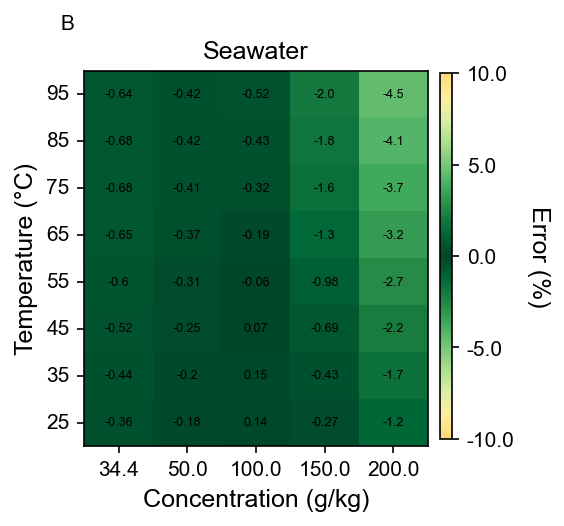

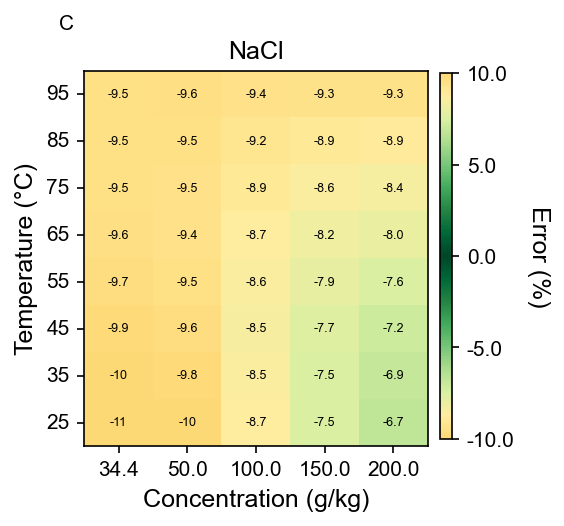

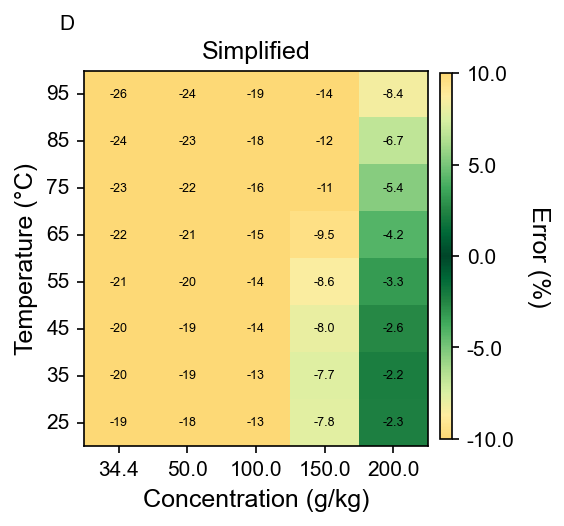

In [11]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 1, "Osmotic Pressure", "Seawater", "B", "plot_sea_Osm_P")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 1, "Osmotic Pressure", "NaCl", "C","plot_nacl_Osm_P")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 1, "Osmotic Pressure", "Simplified", "D", "plot_simple_Osm_P")

(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 0.07188931979010409 34.4 25.0
[0] [1] 0.06251061061189324 34.4 35.0
[0] [2] 0.060099587972990025 34.4 45.0
[0] [3] 0.06413638086716986 34.4 55.0
[0] [4] 0.07282292290519399 34.4 65.0
[0] [5] 0.08457045850735649 34.4 75.0
[0] [6] 0.097955191665428 34.4 85.0
[0] [7] 0.11176618230939589 34.4 95.0
[1] [0] 0.1323752257055598 50.0 25.0
[1] [1] 0.12176116750898452 50.0 35.0
[1] [2] 0.120888098566697 50.0 45.0
[1] [3] 0.1275150432493439 50.0 55.0
[1] [4] 0.1398790012186551 50.0 65.0
[1] [5] 0.15570465015451476 50.0 75.0
[1] [6] 0.17387043963528842 50.0 85.0
[1] [7] 0.19311408183315168 50.0 95.0
[2] [0] 0.43101064403190714 100.0 25.0
[2] [1] 0.4143973924204041 100.0 35.0
[2] [2] 0.4159508947385372 100.0 45.0
[2] [3] 0.4302959483075217 100.0 55.0
[2] [4] 0.45341891023010833 100.0 65.0
[2] [5] 0.48277859508934173 100.0 75.0
[2] [6] 0.5167564898365604 100.0 85.0
[2] [7] 0.5550607452425447 100.0 95.0
[3] [0] 0.840919463

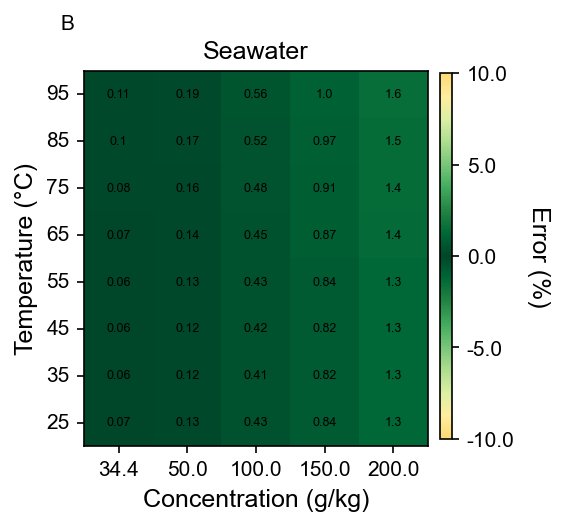

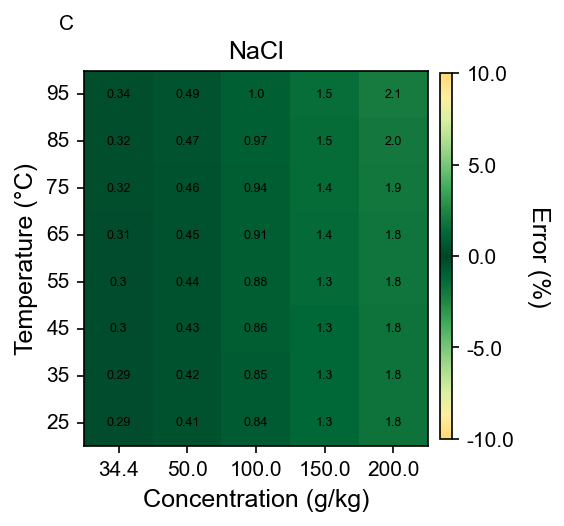

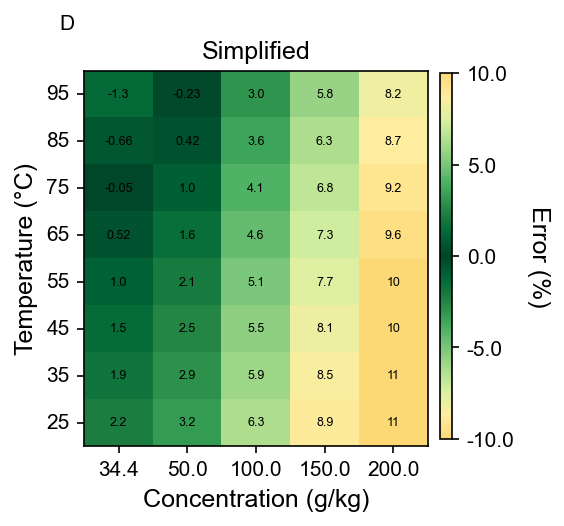

In [12]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 1, "Density", "Seawater","B","plot_sea_dens")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 1, "Density", "NaCl", "C", "plot_nacl_dens")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 1, "Density", "Simplified", "D","plot_simple_dens")

(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 1.338844141849428 34.4 25.0
[0] [1] 1.3600552984483876 34.4 35.0
[0] [2] 1.4092438387114943 34.4 45.0
[0] [3] 1.5093620149462077 34.4 55.0
[0] [4] 1.6209302834429669 34.4 65.0
[0] [5] 1.7787633267751222 34.4 75.0
[0] [6] 1.9892007644124723 34.4 85.0
[0] [7] 2.2588370674902225 34.4 95.0
[1] [0] 1.3311615791049791 50.0 25.0
[1] [1] 1.3385197131629953 50.0 35.0
[1] [2] 1.3733985228616277 50.0 45.0
[1] [3] 1.441234071943513 50.0 55.0
[1] [4] 1.5479120079047326 50.0 65.0
[1] [5] 1.6998576986542062 50.0 75.0
[1] [6] 1.9035480724066955 50.0 85.0
[1] [7] 2.165505462568661 50.0 95.0
[2] [0] 0.8871507658884611 100.0 25.0
[2] [1] 0.8915734620192255 100.0 35.0
[2] [2] 0.9164437429155255 100.0 45.0
[2] [3] 0.9685588704407961 100.0 55.0
[2] [4] 1.0547464228189585 100.0 65.0
[2] [5] 1.1825261826299778 100.0 75.0
[2] [6] 1.3589582836313596 100.0 85.0
[2] [7] 1.5908873957799803 100.0 95.0
[3] [0] 0.1322059532117822 150.0 25

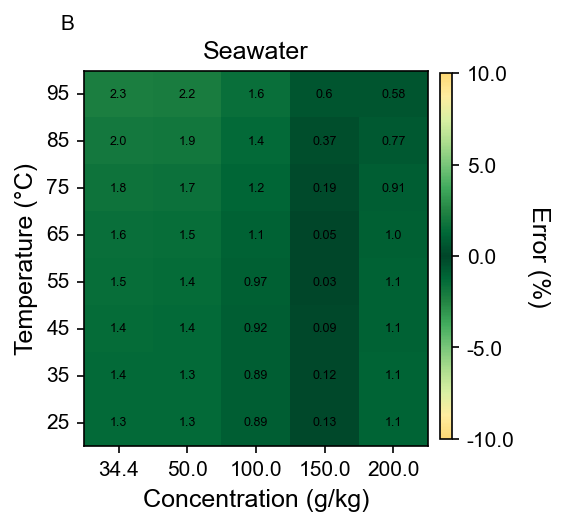

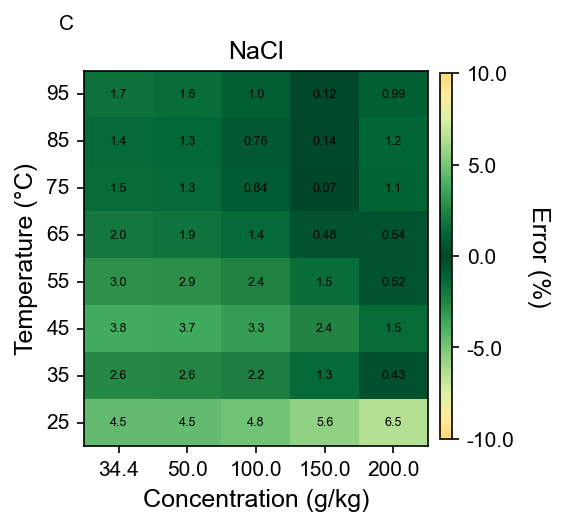

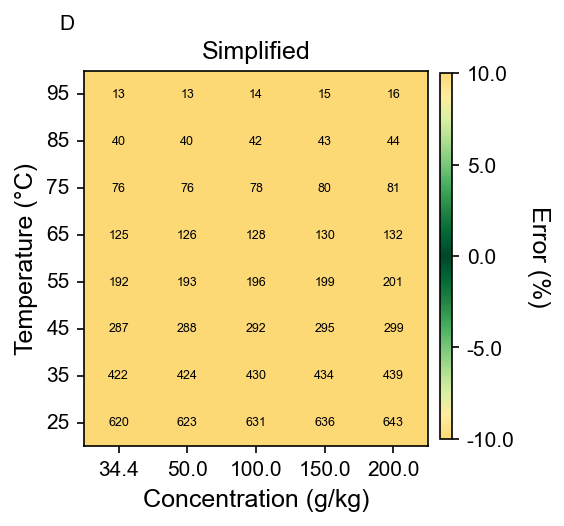

In [13]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 0, "Vap Pressure", "Seawater","B","plot_sea_vap_P")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 0, "Vap Pressure", "NaCl", "C","plot_nacl_vap_P")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 0, "Vap Pressure", "Simplified", "D", "plot_simple_vap_P")

(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 0.5464697961110342 34.4 25.0
[0] [1] 0.9942569583001428 34.4 35.0
[0] [2] 1.3774677205361567 34.4 45.0
[0] [3] 1.7500165253934254 34.4 55.0
[0] [4] 2.096711186068961 34.4 65.0
[0] [5] 2.4554309869509243 34.4 75.0
[0] [6] 2.8379570630330226 34.4 85.0
[0] [7] 3.2543112770990708 34.4 95.0
[1] [0] 1.0890074639940444 50.0 25.0
[1] [1] 1.6020405717609942 50.0 35.0
[1] [2] 2.0498698674316778 50.0 45.0
[1] [3] 2.4751321464564167 50.0 55.0
[1] [4] 2.9013806145725547 50.0 65.0
[1] [5] 3.345500627565591 50.0 75.0
[1] [6] 3.8207138216309575 50.0 85.0
[1] [7] 4.337803472438199 50.0 95.0
[2] [0] 3.0922801544050937 100.0 25.0
[2] [1] 3.508361022259058 100.0 35.0
[2] [2] 4.006149158021024 100.0 45.0
[2] [3] 4.55417829962298 100.0 55.0
[2] [4] 5.153840867477926 100.0 65.0
[2] [5] 5.814304645233876 100.0 75.0
[2] [6] 6.545208671488047 100.0 85.0
[2] [7] 7.355323041227907 100.0 95.0
[3] [0] 5.20409916360344 150.0 25.0
[3] [1]

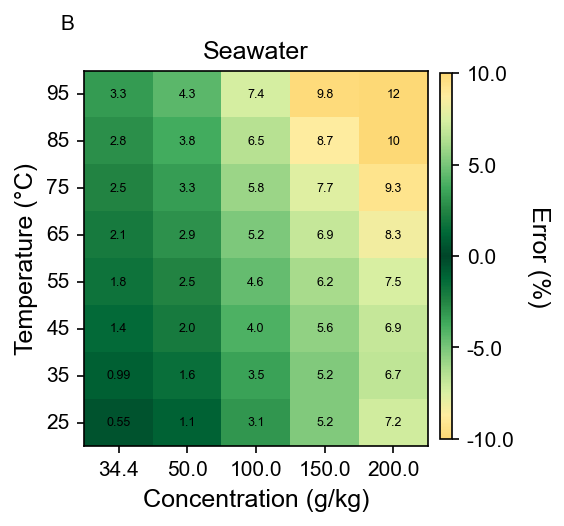

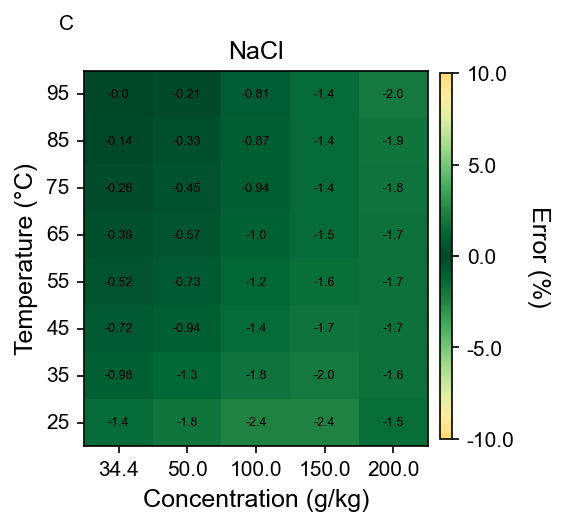

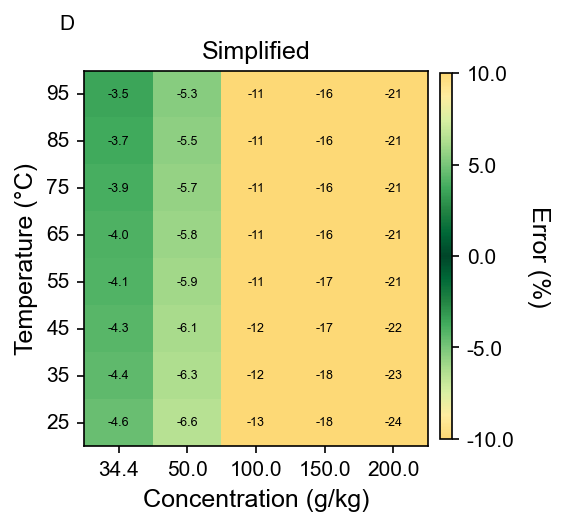

In [14]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 2, "Enthalpy", "Seawater", "B", "plot_sea_Enthalpy")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 2, "Enthalpy", "NaCl", "C","plot_nacl_Enthalpy")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 2, "Enthalpy", "Simplified", "D", "plot_simple_Enthalpy")